#Prediksi Autentikasi Uang Kertas

##Penjelasan Dataset

**Sumber Data**: [KAGGLE] https://www.kaggle.com/datasets/shantanuss/banknote-authentication-uci

**Tujuan Dataset**: Untuk mengklasifikasikan banknote sebagai asli atau palsu berdasarkan fitur statistik yang dihasilkan dari gambar.

**Atribut dalam Dataset**:

- variance: Variansi dari gambar yang ditransformasikan dengan Wavelet (kontinu).
- skewness: Kecondongan distribusi dari gambar yang ditransformasikan dengan Wavelet (kontinu).
- curtosis: Kurtosis distribusi dari gambar yang ditransformasikan dengan Wavelet (kontinu).
- entropy: Entropi dari gambar (kontinu).

**Target**:
- class: Kelas dari banknote (0 untuk palsu, 1 untuk asli).
Ukuran Dataset: 1.372 baris dan 5 kolom.

**Tipe Data**:

Empat atribut numerik kontinu.
Satu atribut kategori biner (class).

##Data Understanding

**Jumlah Data**: 1372 sampel.

**Distribusi Data**:
- Rata-rata nilai untuk setiap fitur (mean variance = 0.433735).
- Data tidak memiliki nilai yang hilang.

**Range Nilai**:
- variance: Dari -7.04 hingga 6.82.
- skewness: Dari -13.77 hingga 12.95.
- curtosis: Dari -5.28 hingga 17.92.
- entropy: Dari -8.54 hingga 2.45.

##Business Understanding

**Tujuan Bisnis**:

- Menentukan apakah sebuah banknote asli atau palsu menggunakan algoritma klasifikasi berbasis statistik.
- Hasil ini penting untuk membantu sistem otomasi seperti ATM dan mesin penghitung uang untuk mendeteksi pemalsuan.

**Manfaat Bisnis**:

- Mengurangi risiko keuangan dari distribusi uang palsu.
- Meningkatkan kepercayaan pengguna pada sistem otomatisasi perbankan.

##Exploratory Data Analysis

###Import Libraries

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Load Dataset

In [ ]:
# Load Dataset
df = pd.read_csv('/content/BankNoteAuthentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


###Data Preperation

In [ ]:
# Data preparation and Exploration
print('Number of Rows: ', df.shape[0])
print('Number of Columns: ', df.shape[1], '\n')
print('SubSet of Data:\n ', df.head(), '\n')

Number of Rows:  1372
Number of Columns:  5 

SubSet of Data:
     variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0 



###Labeling

In [ ]:
# labeling data
labels = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target']
df.columns = labels
print('Columns Names:', df.columns, '\n')
print('Data Describe:\n ', df.describe(), '\n')
print('Data Information:'); print(df.info())

Columns Names: Index(['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Target'], dtype='object') 

Data Describe:
            Variance     Skewness     Kurtosis      Entropy       Target
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000 

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1 

###Cek Data yang Duplikat

In [ ]:
# Check For duplicated
print(df.duplicated().any())
duplicated = df.duplicated()
print('Number of duplicated data: ', duplicated[duplicated == True].size)

True
Number of duplicated data:  24


###EDA

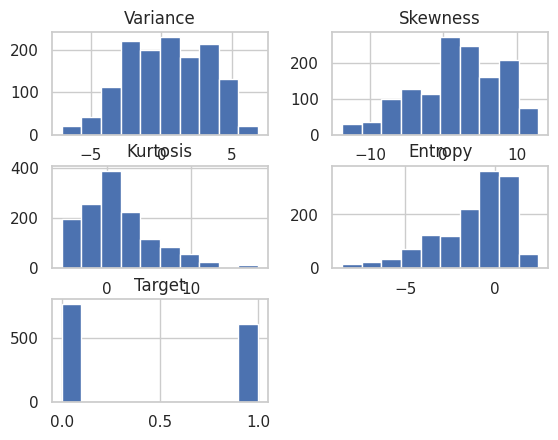

In [ ]:
# Data histogram
df.hist()
plt.show()

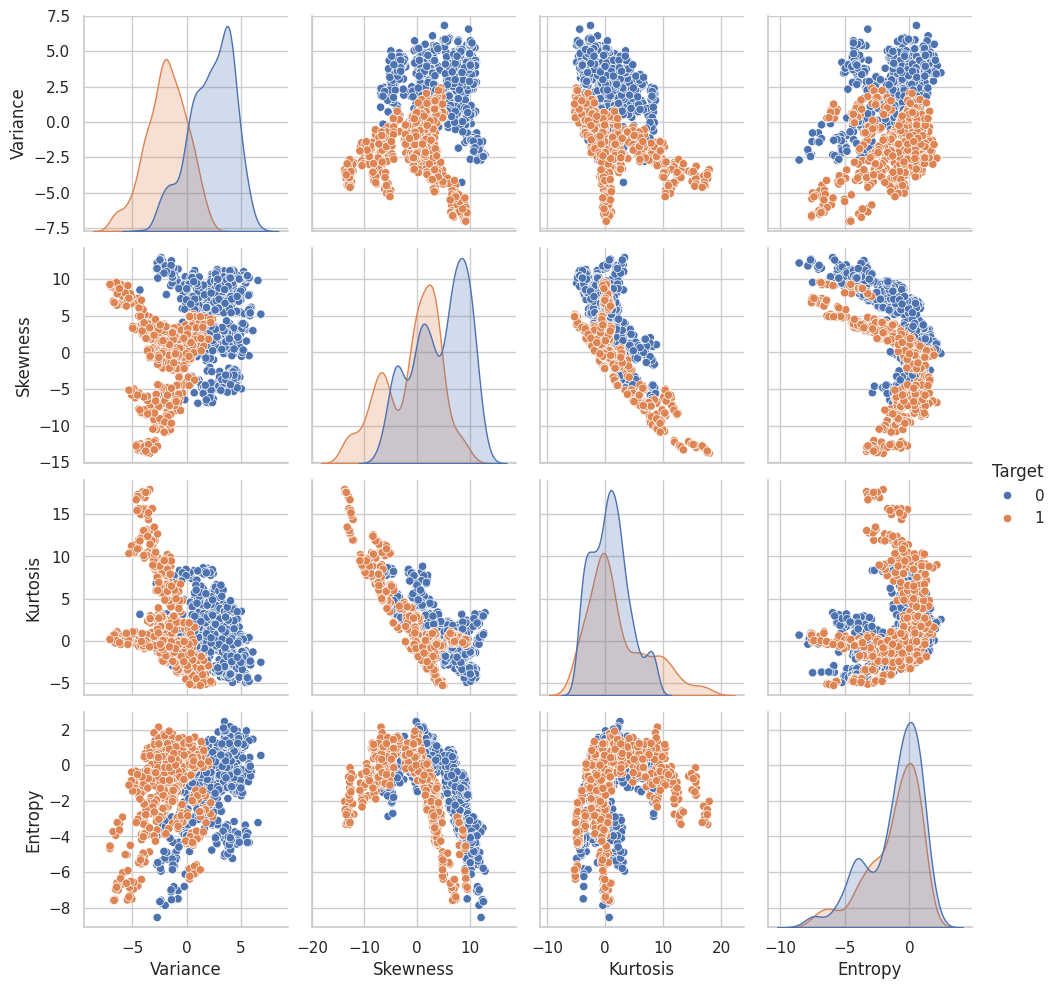

In [ ]:
sns.pairplot(data=df, hue='Target')
plt.show()

Correlation:
Target      1.000000
Kurtosis    0.155883
Entropy    -0.023424
Skewness   -0.444688
Variance   -0.724843
Name: Target, dtype: float64


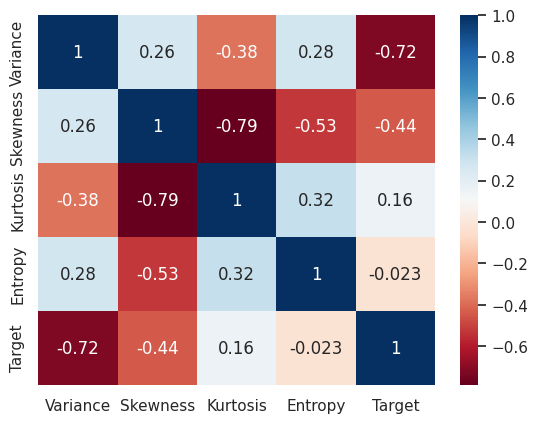

In [ ]:
# Check correlation
print('Correlation:')
print(df.corr()['Target'].sort_values(ascending=False))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [ ]:
print('Number of Authentication= ', df['Target'][df['Target'] == 0].count())
print('Number of Unauthenticated= ', df['Target'][df['Target'] == 1].count())

Number of Authentication=  762
Number of Unauthenticated=  610
